In [1]:
import numpy as np
import timeit
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

### CO2 Time Series Data
### (1) ARIMA model with no seasonality

In [2]:
co2_data = pd.read_csv('/home/aumaron/Desktop/other_projects/datasets/TS_CO2_Data.csv')
co2_data

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1994,363.05,364.18,364.87,364.47,364.32,362.13,356.72,350.88,350.69,356.06,360.09,363.27
1995,363.49,364.94,366.72,366.33,365.75,364.32,358.59,352.06,353.45,357.27,362.34,365.65
1996,366.93,366.71,367.63,368.15,369.14,367.33,361.53,356.11,354.51,360.12,363.85,365.52
1997,367.72,369.08,368.17,368.83,369.49,367.57,360.79,355.16,356.01,360.71,364.77,367.81
1998,369.40,370.12,370.88,370.53,371.56,369.28,364.50,357.46,360.54,364.04,368.74,371.58
1999,372.60,373.85,373.75,374.10,374.50,372.04,364.81,359.11,359.65,364.94,369.82,372.62
2000,373.23,375.13,374.83,375.42,376.18,374.01,366.54,360.78,361.77,367.51,370.58,373.37
2001,375.49,375.94,376.42,377.48,377.67,374.78,367.38,361.67,363.39,367.74,373.18,374.41
2002,376.68,377.42,378.27,378.73,379.01,375.95,370.78,364.07,365.36,370.25,374.04,377.99
2003,379.03,379.36,380.90,381.39,382.38,381.02,373.78,367.97,368.55,372.28,377.75,379.99


In [3]:
# Convert from matrix to vector
co2_vector = co2_data.values.flatten()
co2_vector
# co2_vec = pd.DataFrame(co2_vector, columns = ["date", "levels"])

array([363.05, 364.18, 364.87, 364.47, 364.32, 362.13, 356.72, 350.88,
       350.69, 356.06, 360.09, 363.27, 363.49, 364.94, 366.72, 366.33,
       365.75, 364.32, 358.59, 352.06, 353.45, 357.27, 362.34, 365.65,
       366.93, 366.71, 367.63, 368.15, 369.14, 367.33, 361.53, 356.11,
       354.51, 360.12, 363.85, 365.52, 367.72, 369.08, 368.17, 368.83,
       369.49, 367.57, 360.79, 355.16, 356.01, 360.71, 364.77, 367.81,
       369.4 , 370.12, 370.88, 370.53, 371.56, 369.28, 364.5 , 357.46,
       360.54, 364.04, 368.74, 371.58, 372.6 , 373.85, 373.75, 374.1 ,
       374.5 , 372.04, 364.81, 359.11, 359.65, 364.94, 369.82, 372.62,
       373.23, 375.13, 374.83, 375.42, 376.18, 374.01, 366.54, 360.78,
       361.77, 367.51, 370.58, 373.37, 375.49, 375.94, 376.42, 377.48,
       377.67, 374.78, 367.38, 361.67, 363.39, 367.74, 373.18, 374.41,
       376.68, 377.42, 378.27, 378.73, 379.01, 375.95, 370.78, 364.07,
       365.36, 370.25, 374.04, 377.99, 379.03, 379.36, 380.9 , 381.39,
      

### ACF and PACF

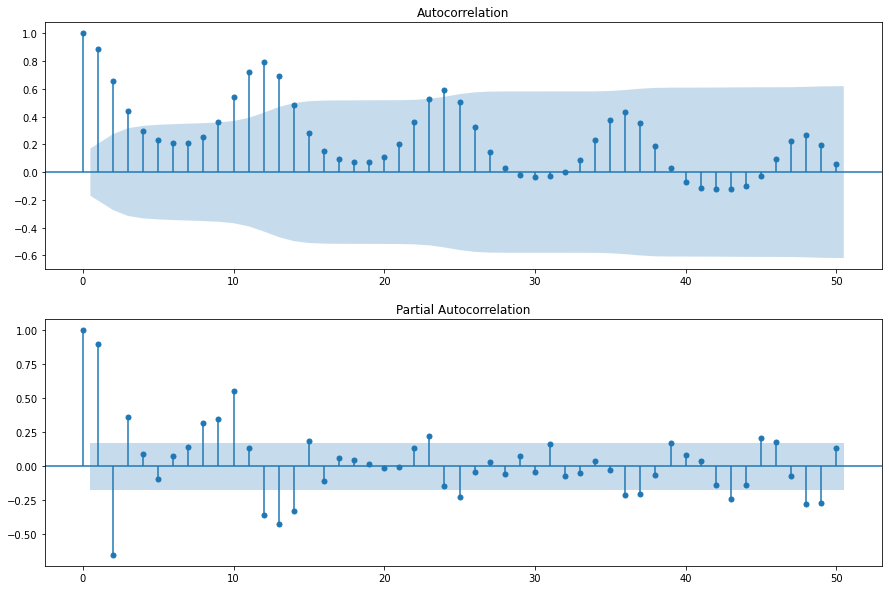

In [4]:
figure = plt.figure(figsize=(15,10))
axis1 = figure.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(co2_vector, lags=50, ax=axis1)
axis2 = figure.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(co2_vector, lags=50, ax=axis2)

In [5]:
# %%timeit -n 1000
co2_composite_model_011 = ARIMA(endog=co2_vector, order=(1, 0, 1)).fit()
# y_t = const + coef*y_t-1

/home/aumaron/Desktop/other_projects/venv/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [6]:
print(co2_composite_model_011.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  132
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -310.238
Date:                Mon, 17 May 2021   AIC                            628.476
Time:                        14:19:03   BIC                            640.007
Sample:                             0   HQIC                           633.161
                                - 132                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        369.3727      2.893    127.698      0.000     363.703     375.042
ar.L1          0.8531      0.048     17.643      0.000       0.758       0.948
ma.L1          0.6889      0.078      8.797      0.0

In [7]:
# Option 1: Predict the next 12 values by choosing '132' as the start index for out-of-sample prediction
predict_co2 = co2_composite_model_011.predict(132, 132+12)
predict_co2

array([381.69028675, 379.88053122, 378.33667293, 377.01964508,
       375.89612076, 374.93766957, 374.12003824, 373.4225369 ,
       372.82751552, 372.3199173 , 371.88689764, 371.51749914,
       371.20237428])

In [8]:
0.9506*(co2_vector[131] - 369.0796) + 369.0796

381.00050424

### (2) ARIMA model with seasonal and non-seasonal components

In [9]:
# %%timeit -n 10
co2_composite_model_011 = ARIMA(endog=co2_vector, order=(1, 0, 1)).fit()

/home/aumaron/Desktop/other_projects/venv/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


print(co2_composite_model_011.summary())

### Code for out-of-sample forecasting & corresponding confidence interval

In [10]:
predict_co2

array([381.69028675, 379.88053122, 378.33667293, 377.01964508,
       375.89612076, 374.93766957, 374.12003824, 373.4225369 ,
       372.82751552, 372.3199173 , 371.88689764, 371.51749914,
       371.20237428])

In [11]:
co2_composite_model_011# Option 2: Perform forecasting using ARIMAResults object
predict_co2_oos = co2_composite_model_011.forecast(steps=12)

In [12]:
predict_co2_oos

array([381.69028675, 379.88053122, 378.33667293, 377.01964508,
       375.89612076, 374.93766957, 374.12003824, 373.4225369 ,
       372.82751552, 372.3199173 , 371.88689764, 371.51749914])

In [13]:
# Option 3: Perform forecasting using ARIMAResults object with confidence interval
predict_co2_PI_oos = co2_composite_model_011.get_forecast(steps=12)

In [14]:
predict_co2_PI_oos.predicted_mean

array([381.69028675, 379.88053122, 378.33667293, 377.01964508,
       375.89612076, 374.93766957, 374.12003824, 373.4225369 ,
       372.82751552, 372.3199173 , 371.88689764, 371.51749914])

In [15]:
# Results are identical to those obtained using 'forecast'
np.all(predict_co2_PI_oos.predicted_mean == predict_co2_oos)

True

In [16]:
# 95% confidence interval for each of the 12 out-of-sample forecasted values
predict_co2_PI_oos.conf_int(alpha=0.05)

array([[376.76980808, 386.61076542],
       [370.83746643, 388.92359601],
       [367.21597508, 389.45737077],
       [364.60364834, 389.43564182],
       [362.6166794 , 389.17556211],
       [361.06360797, 388.81173117],
       [359.82879409, 388.41128239],
       [358.83519189, 388.00988191],
       [358.02841069, 387.62662036],
       [357.3685922 , 387.27124241],
       [356.82576322, 386.94803206],
       [356.37695297, 386.6580453 ]])

### Forward chaining

In [9]:
from sklearn.model_selection import TimeSeriesSplit

In [10]:
tscv = TimeSeriesSplit(n_splits=3, test_size=3)

In [26]:
pred_mean = []
actual = []
conf_interval = []
for train_index, test_index in tscv.split(co2_vector):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = co2_vector[train_index], co2_vector[test_index]
    _model = ARIMA(endog=X_train, order=(1, 0, 1)).fit()
    predict = _model.get_forecast(steps=3)
    pred_mean.extend(predict.predicted_mean)
    actual.extend(X_test)
    conf_interval.extend(predict.conf_int(alpha=0.05))

    print("Actual: ", co2_vector[test_index])
    print("Predict: ", predict.predicted_mean)
    

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122] TEST: [123 124 125]
Actual:  [383.21 383.58 382.59]
Predict:  [380.77434954 378.99172313 377.47461009]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  

/home/aumaron/Desktop/other_projects/venv/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [28]:
print(actual) 
print(conf_interval)

[383.21, 383.58, 382.59, 374.58, 368.69, 368.55, 373.39, 378.49, 381.62]
[array([375.93929279, 385.60940629]), array([370.14181195, 387.84163431]), array([366.60649369, 388.34272649]), array([376.28138126, 385.87429089]), array([370.59786206, 388.26001706]), array([367.10760891, 388.90838833]), array([363.88539064, 373.62693272]), array([359.81187151, 377.64882239]), array([357.78963151, 379.62752805])]


In [27]:
diff = []
lies_within = []
for i, _ in enumerate(actual):
    if _ >= conf_interval[i][0] and _ <= conf_interval[i][1]:
        lies_within.append(True)
    else:
        lies_within.append(False)
        
lies_within

[True, True, True, False, False, True, True, False, False]

In [31]:
a = pd.DataFrame({
    "Actual": actual,
    "Forecast": pred_mean,
    "lower_limit": [interval[0] for interval in conf_interval],
    "upper_limit": [interval[1] for interval in conf_interval],
    "forecast_within_limit": lies_within
})

In [32]:
a

,Actual,Forecast,lower_limit,upper_limit,forecast_within_limit
0,383.21,380.774350,375.939293,385.609406,True
1,383.58,378.991723,370.141812,387.841634,True
2,382.59,377.474610,366.606494,388.342726,True
3,374.58,381.077836,376.281381,385.874291,False
4,368.69,379.428940,370.597862,388.260017,False
5,368.55,378.007999,367.107609,388.908388,True
6,373.39,368.756162,363.885391,373.626933,True
7,378.49,368.730347,359.811872,377.648822,False
8,381.62,368.708580,357.789632,379.627528,False


In [21]:
conf_interval[0][0]

array([375.93929279, 385.60940629])

In [ ]:
col_names = Actual, pred_mean, lower_ci, upper_ci, within_interval